In [5]:
from tensorflow.keras.datasets import cifar10

(train_images, train_targets), (test_images, test_targets) = cifar10.load_data()

# 타겟 데이터의 dimension은 1로 맞춰준다.
# one-hot encoding의 적용 여부를 판단하기 편하다.
print(train_images.shape, train_targets.squeeze().shape)
print(test_images.shape, test_targets.squeeze().shape)

(50000, 32, 32, 3) (50000,)
(10000, 32, 32, 3) (10000,)


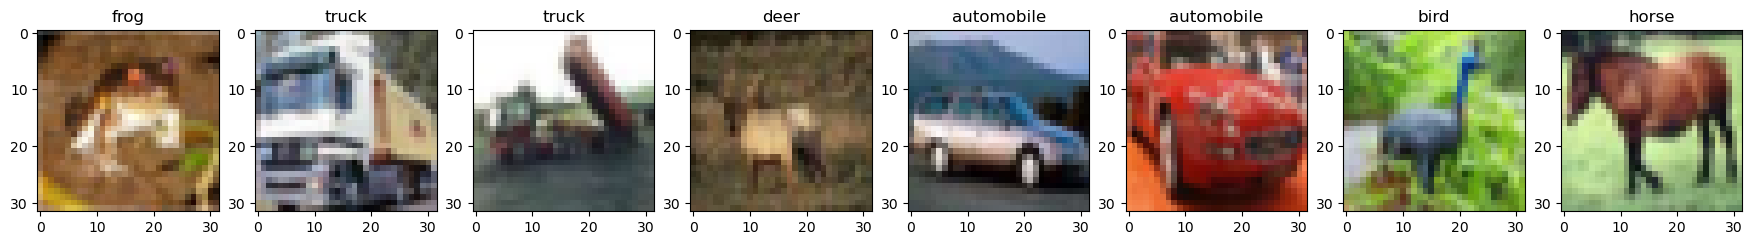

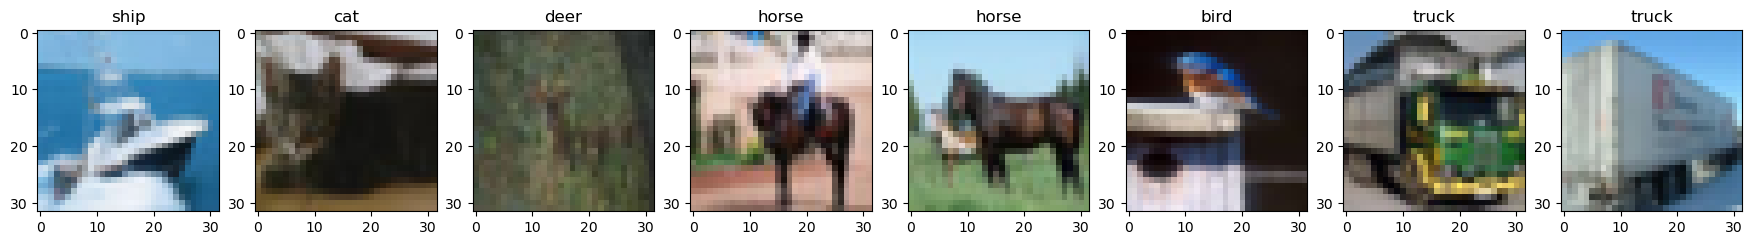

In [6]:
import matplotlib.pyplot as plt

def show_images(images, targets, ncols=8):
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    fig, axes = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)
    for i in range(ncols):
        axes[i].imshow(images[i])
        target = targets[i].squeeze()
        axes[i].set_title(class_names[int(target)])

show_images(train_images[:8], train_targets[:8])
show_images(train_images[8:16], train_targets[8:16])

In [7]:
import numpy as np

def get_preprocessed_data(images, targets):
    images = np.array(images / 255.0, dtype=np.float32)
    targets = np.array(targets, dtype=np.float32)

    return images, targets

train_images, train_targets = get_preprocessed_data(train_images, train_targets)
test_images, test_targets = get_preprocessed_data(test_images, test_targets)

In [8]:
train_targets = train_targets.squeeze()
test_targets = test_targets.squeeze()

print(train_images.shape, train_targets.shape)
print(test_images.shape, test_targets.shape)

(50000, 32, 32, 3) (50000,)
(10000, 32, 32, 3) (10000,)


In [14]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, Dropout, MaxPooling2D, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

IMAGE_SIZE = 32

input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

x = Conv2D(filters=32, kernel_size=5, padding='valid', activation='relu')(input_tensor)
x = Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')(x)
x = MaxPooling2D(2)(x)

x = Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x)
x = Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)

x = Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(x)
x = Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(x)
x = Activation('relu')(x)
x = MaxPooling2D(2)(x)

x = Flatten(name='classifierA00')(x)
x = Dropout(name='classifierA_DropOut_01', rate=0.5)(x)
x = Dense(300, name='classifierAD01', activation='relu')(x)
x = Dropout(name='classifierA_DropOut_02', rate=0.3)(x)
output = Dense(10, activation='softmax', name='output')(x)

model = Model(inputs=input_tensor, outputs=output)
model.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 28, 28, 32)          │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 14, 14, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 7, 7, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 7, 7, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ classifierA00 (Flatten)              │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ classifierA_DropOut_01 (Dropout)     │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ classifierAD01 (Dense)               │ (None, 300)                 │         345,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ classifierA_DropOut_02 (Dropout)     │ (None, 300)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 10)                  │           3,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 637,454 (2.43 MB)

 Trainable params: 637,454 (2.43 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(), metrics=['acc'])

In [16]:
history = model.fit(x=train_images, y=train_targets, batch_size=128, epochs=30, validation_split=0.2)

Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 46ms/step - acc: 0.2462 - loss: 1.9816 - val_acc: 0.4744 - val_loss: 1.4321
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step - acc: 0.4808 - loss: 1.4020 - val_acc: 0.5811 - val_loss: 1.1611
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 53ms/step - acc: 0.5773 - loss: 1.1840 - val_acc: 0.6334 - val_loss: 1.0193
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 55ms/step - acc: 0.6291 - loss: 1.0367 - val_acc: 0.6774 - val_loss: 0.9186
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 67ms/step - acc: 0.6782 - loss: 0.9079 - val_acc: 0.7009 - val_loss: 0.8359
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 34s 107ms/step - acc: 0.7083 - loss: 0.8208 - val_acc: 0.7183 - val_loss: 0.8022
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 29s 93ms/step - acc: 0.7293 - loss: 0.7589 - val_acc: 0.7357 - val_loss: 0.7581
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 27s 87ms/step - acc: 0.7548 - loss: 0.6953 - val_acc: 0.7498 - val_loss: 0.7148
Epoch 9/30
313/313 ━━━━━━━━━━━━━━━━━━━━

In [17]:
model.evaluate(test_images, test_targets, batch_size=64)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.7890 - loss: 0.7364


[0.7494139671325684, 0.7856000065803528]

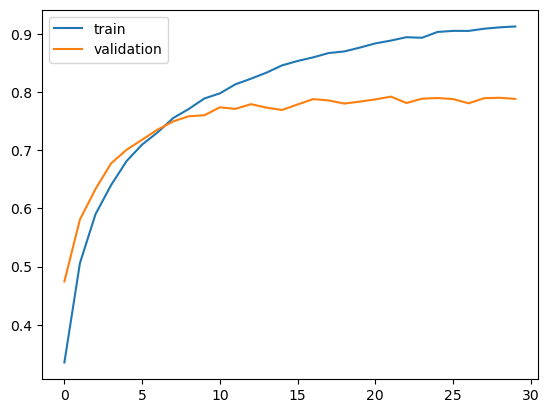

In [18]:
import matplotlib.pyplot as plt

def show_history(history):
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.legend()
    plt.show()

show_history(history)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[3 9 0 9 5 7 9 8]


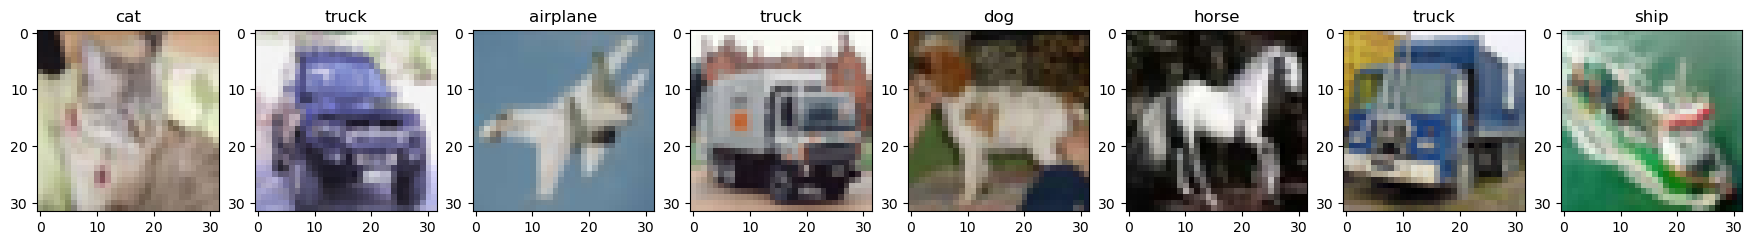

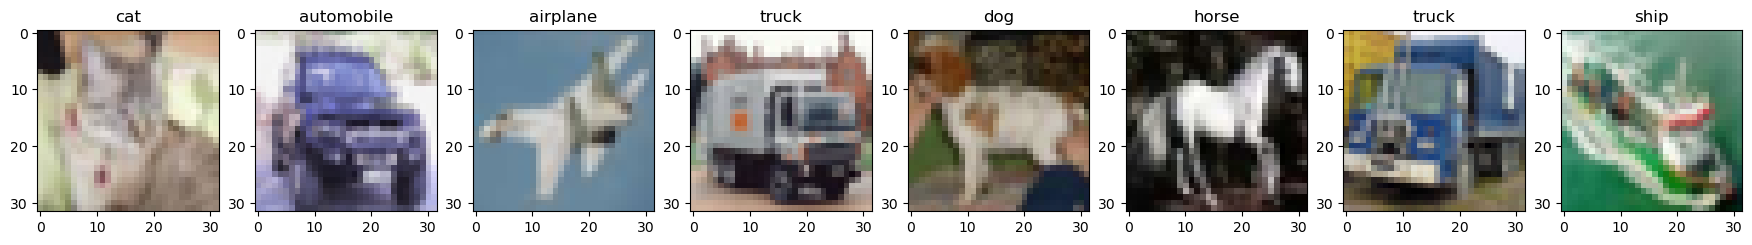

In [23]:
pred_probas = model.predict(test_images[8:16], batch_size=128)
pred_classes = np.argmax(pred_probas.squeeze(), axis=1)
print(pred_classes)

show_images(test_images[8:16], pred_classes)
show_images(test_images[8:16], test_targets[8:16])